<a href="https://colab.research.google.com/github/SamuelOliveira/Colab/blob/main/FT084_2021S1_T2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Author: Samuel Oliveira da Silva
RA: 231294
Email: s231294@g.unicamp.br
FT084_2021S1_T2
```

### **Instalando Bibliotecas**
```
install.packages('MASS', dependencies = TRUE)
install.packages('caret', dependencies = TRUE)
install.packages('leaps', dependencies = TRUE)
install.packages('corrplot', dependencies = TRUE)
```


In [24]:
# install.packages('MASS')
# install.packages('caret')
# install.packages('leaps')
# install.packages('corrplot')

### **Importando Bibliotecas**
```
library(MASS)
library(caret)
library(leaps)
library(ggplot2)
library(tidyverse)
```

In [25]:
library(MASS)
library(caret)
library(leaps)
library(ggplot2)
library(corrplot)
library(tidyverse)

### **Inspecionando Conjunto de Dados Boston**
1.   Análise Exploratória(Dados)
```
head(Boston)
```
2.   Distribuição de Frequência(Histograma)
```
ggplot(gather(Boston), aes(value)) + 
geom_histogram(bins = 10) + 
facet_wrap(~key, scales = 'free_x')
```


In [ ]:
boston.df <-Boston

head(boston.df)

### **Pre-processamento**
1.   Normalizando variaveis numericas

In [ ]:
boston.dp <- scale(boston.df[,1:13])

y <- boston.df[,14]
boston.df_p <- cbind(boston.dp,y)
boston.df_p <- as.data.frame(boston.df_p)

boston.df_p

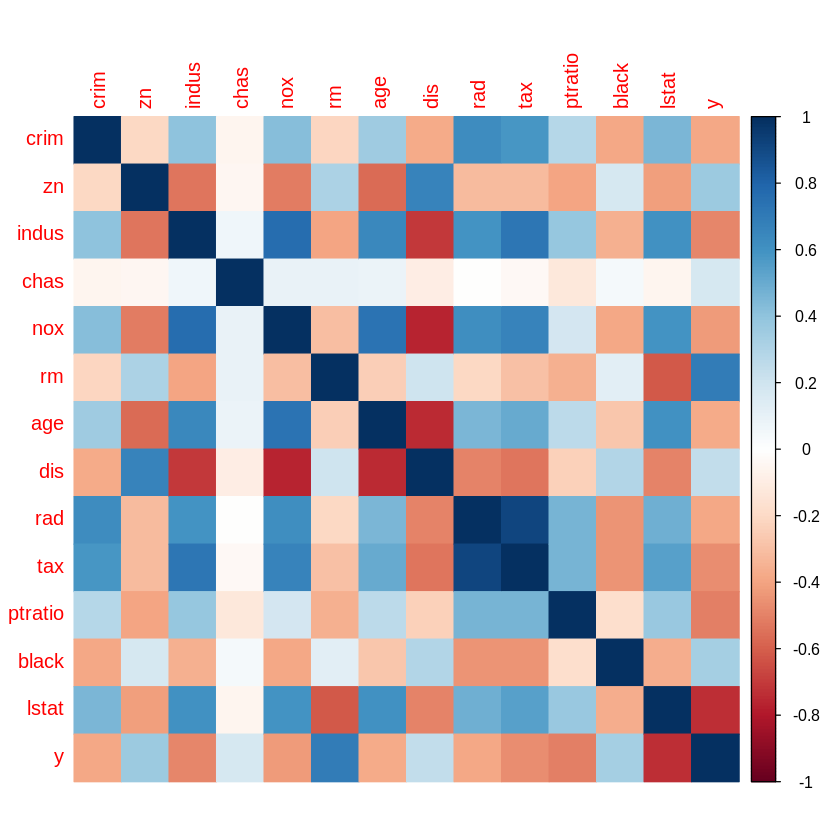

In [41]:
num_vars <- sapply(boston.df_p,is.numeric) 
corr <- cor(boston.df_p[num_vars]) 
corrplot(corr, method = "color") 

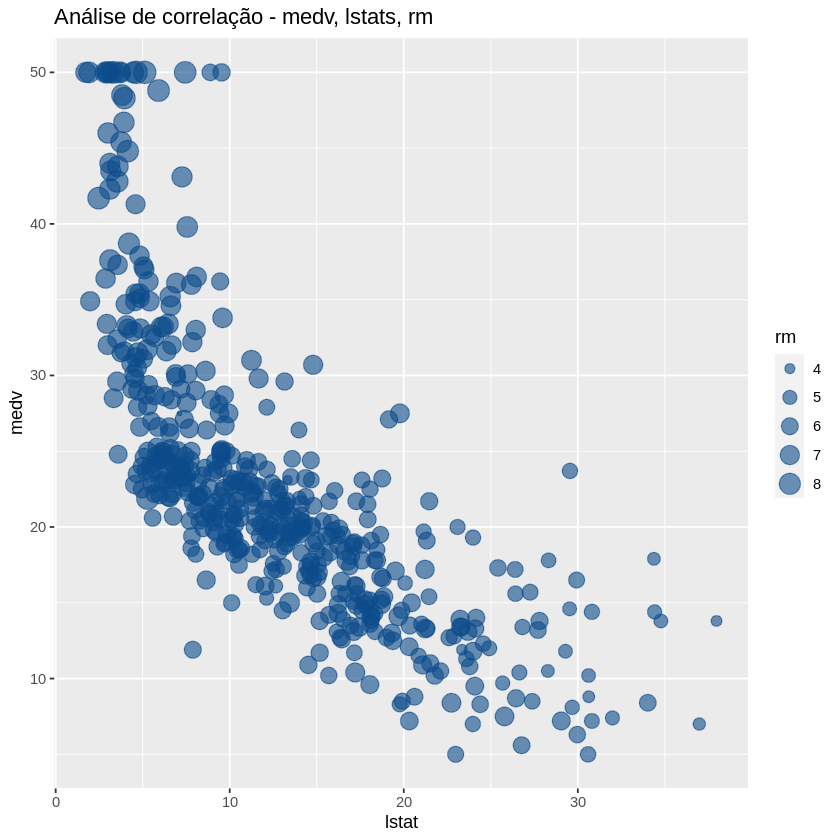

In [42]:
ggplot(boston.df) +
  aes(x = lstat, y = medv, size = rm) +
  geom_point(colour = "#0c4c8a", alpha = 0.6)+
  labs(title = "Análise de correlação - medv, lstats, rm")

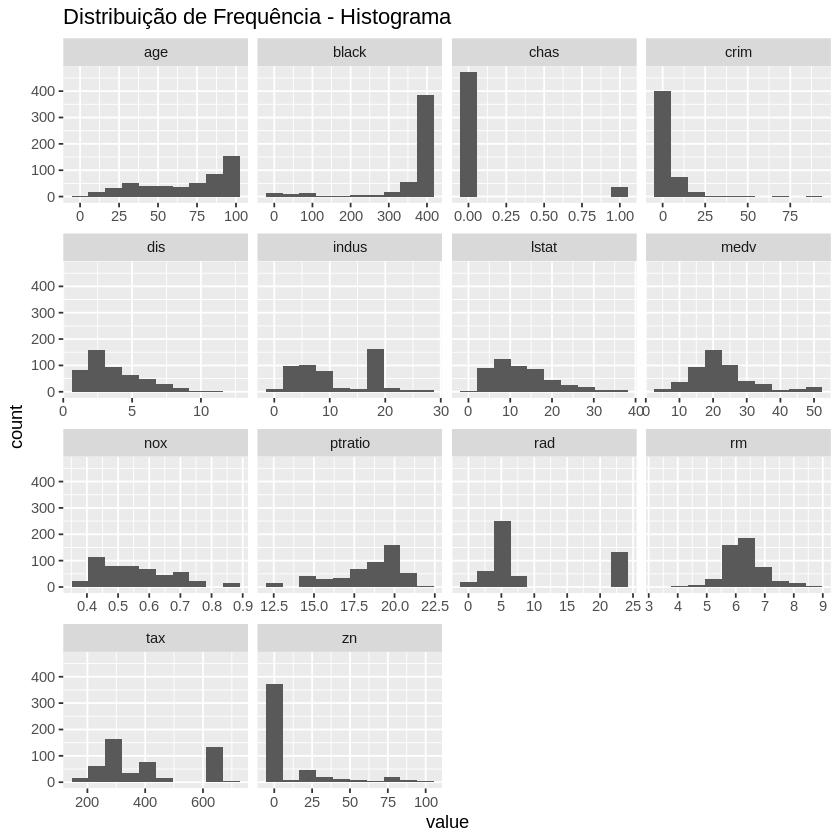

In [44]:
ggplot(gather(boston.df), aes(value)) + 
    geom_histogram(bins = 10) + 
    facet_wrap(~key, scales = 'free_x') +
    labs(title = "Distribuição de Frequência - Histograma")

### **Criando Subconjuntos**
*   Teste (100 observações)
*   Treino (406 observações)
*   Modelo de Treino
```
split <-sample(nrow(boston.df), 100)
boston.df.test  <-boston.df[split,]
boston.df.train <-boston.df[-split,]
model.train <-regsubsets(medv~., data=boston.df.train, nvmax=13)
model.train.sum <-summary(model.train)
```


In [28]:
split <-sample(nrow(boston.df), 100)
boston.df.test  <-boston.df[split,]
boston.df.train <-boston.df[-split,]
model.train <-regsubsets(medv~., data=boston.df.train, nvmax=13)
model.train.sum <-summary(model.train)

### **a.** Selecionando Melhor Conjunto de Atributos
**(a)** Use a função regsubsets() para encontrar o melhor conjunto de  atributos. Qual é o melhor modelo de acordo com as medidas **Cp**, **BIC**, and **R2** ajustado? Mostre gráficos para dar suporte a sua resposta e mostre os coeficientes do melhor modelo.


1.   **Cp**, **BIC**, and **R2** ajustado
2.   Gráficos
3.   Coeficientes

In [29]:
# Cp, BIC, R2 ajustado
data.frame(
  CP = which.min(model.train.sum$cp),
  BIC = which.min(model.train.sum$bic),
  Adj.R2 = which.max(model.train.sum$adjr2)
)

CP,BIC,Adj.R2
<int>,<int>,<int>
11,11,11


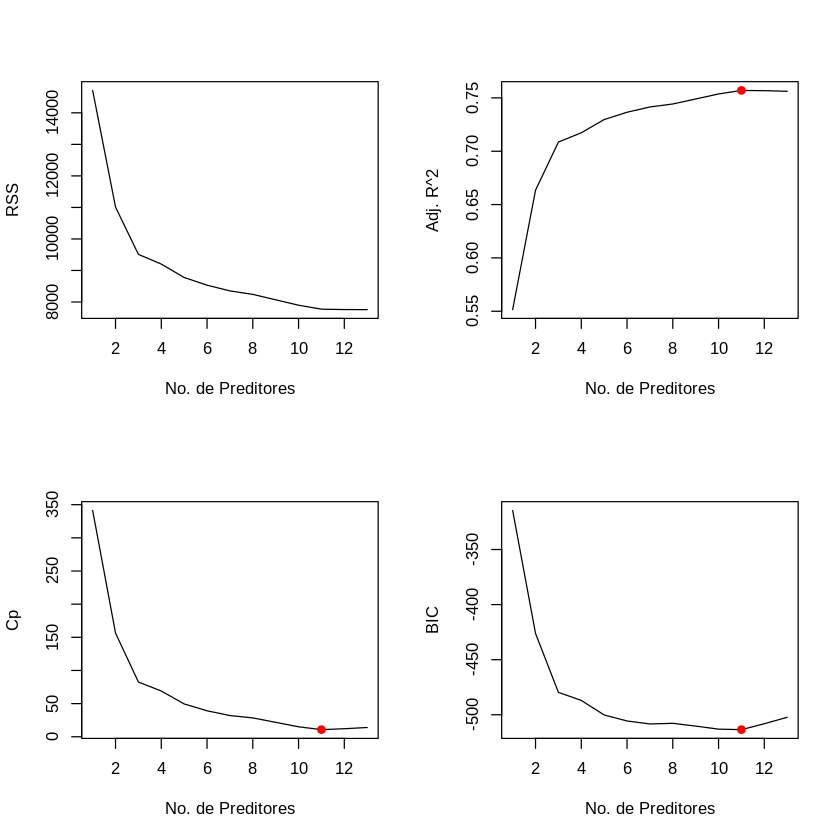

In [30]:
# Gráficos

    # Com isso em mente, realizaremos gráficos para r ao quadrado ajustado,
    # Cp e Critério de Informação Bayesiano.
    # Uma vez plotados, podemos determinar os melhores modelos para cada método
    # usando o melhor desempenho com a menor quantidade de variáveis.
    # Para o r quadrado ajustado, usaremos o maior valor,
    # enquanto para os outros será usado o menor valor.
    # Depois, podemos comparar os resultados para determinar
    # o melhor número de variáveis ​​comuns usadas.

par(mfrow = c(2,2))

# RSS
plot(model.train.sum$rss,xlab='No. de Preditores',ylab='RSS',type='l')

# R2 ajustado
plot(model.train.sum$adjr2,xlab='No. de Preditores',ylab='Adj. R^2',type='l')
max_p = which.max(model.train.sum$adjr2)
points(max_p,model.train.sum$adjr2[max_p],pch=19,col='red')

# Cp
plot(model.train.sum$cp,xlab='No. de Preditores',ylab='Cp',type='l')
min_p = which.min(model.train.sum$cp)
points(min_p,model.train.sum$cp[min_p],pch=19,col='red')

# BIC
plot(model.train.sum$bic,xlab='No. de Preditores',ylab='BIC',type='l')
min_p = which.min(model.train.sum$bic)
points(min_p,model.train.sum$bic[min_p],pch=19,col='red')


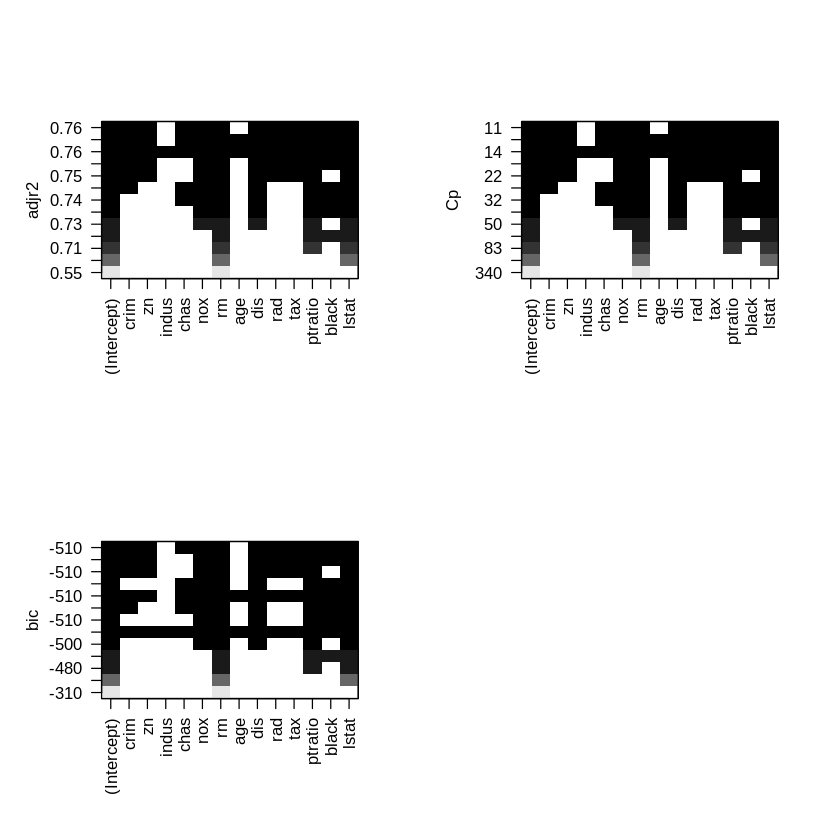

In [31]:
par(mfrow = c(2,2))

# R2 ajustado
plot(model.train,scale='adjr2')

# Cp
plot(model.train,scale='Cp')

# BIC
plot(model.train,scale='bic')

In [32]:
# Coeficientes

best.var <-which.max(model.train.sum$adjr2)

cat(crayon::bold("Melhor número de variáveis ​​comuns:"),
  crayon::reset("",
  best.var,"\n\n"))

model.train.coef <-coef(model.train,best.var)

print(model.train.coef)

Melhor número de variáveis ​​comuns:  11 

  (Intercept)          crim            zn          chas           nox 
 27.180505944  -0.114650248   0.041901760   2.221603845 -15.831334606 
           rm           dis           rad           tax       ptratio 
  4.807855740  -1.269548805   0.274431837  -0.012190071  -0.911118848 
        black         lstat 
  0.008284804  -0.408068410 


### **b.** Seleção Progressiva e Seleção Regressiva
**(b)** Repita o procedimento em **(a)**, usando seleção progressiva e seleção regressiva. Como sua resposta agora se compara aos resultados do item **(a)**?


1.   Seleção Progressiva
2.   Seleção Regressiva
3.   Repita o procedimento feito em **(a)**
  *   **Cp**, **BIC**, and **R2** ajustado
  *   Gráficos
  *   Coeficientes

In [33]:
# Seleção Progressiva
boston.df.train.fwd     <-regsubsets(medv~.,data=boston.df.train,nvmax=13,method='forward')
boston.df.train.fwd.sum <-summary(boston.df.train.fwd)
cat("\n")
# Seleção Regressiva
boston.df.train.bwk     <-regsubsets(medv~.,data=boston.df.train,nvmax=13,method='backward')
boston.df.train.bwk.sum <-summary(boston.df.train.bwk)

In [34]:
# Repita o procedimento feito em **(a)**

# Seleção Progressiva = Cp, BIC, R2 ajustado
cat(crayon::bold("Seleção Progressiva: "),
  crayon::reset("Cp, BIC, R2 ajustado\n\n"))

data.frame(
  CP = which.min(boston.df.train.fwd.sum$cp),
  BIC = which.min(boston.df.train.fwd.sum$bic),
  Adj.R2 = which.max(boston.df.train.fwd.sum$adjr2)
)
cat("\n\n")
# Seleção Regressiva = Cp, BIC, R2 ajustado
cat(crayon::bold("Seleção Regressiva: "),
  crayon::reset("Cp, BIC, R2 ajustado\n\n"))
data.frame(
  CP = which.min(boston.df.train.bwk.sum$cp),
  BIC = which.min(boston.df.train.bwk.sum$bic),
  Adj.R2 = which.max(boston.df.train.bwk.sum$adjr2)
)

Seleção Progressiva:  Cp, BIC, R2 ajustado



CP,BIC,Adj.R2
<int>,<int>,<int>
11,11,11




Seleção Regressiva:  Cp, BIC, R2 ajustado



CP,BIC,Adj.R2
<int>,<int>,<int>
11,11,11


Seleção Progressiva:  Gráficos


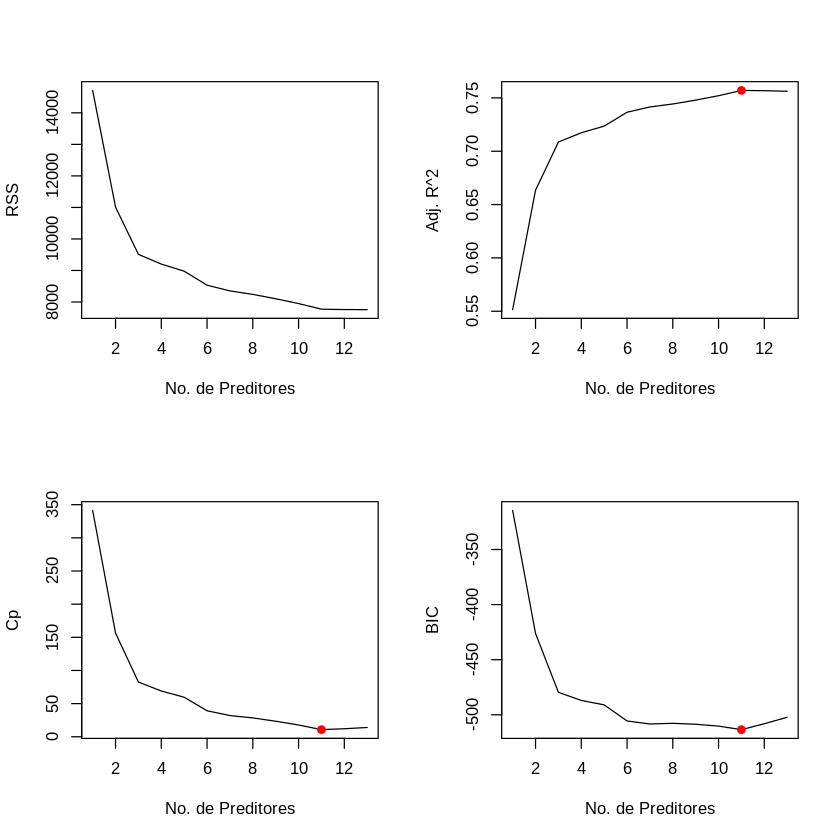

In [35]:
# Gráficos

    # Com isso em mente, realizaremos gráficos para r ao quadrado ajustado,
    # Cp e Critério de Informação Bayesiano.
    # Uma vez plotados, podemos determinar os melhores modelos para cada método
    # usando o melhor desempenho com a menor quantidade de variáveis.
    # Para o r quadrado ajustado, usaremos o maior valor,
    # enquanto para os outros será usado o menor valor.
    # Depois, podemos comparar os resultados para determinar
    # o melhor número de variáveis ​​comuns usadas.

par(mfrow = c(2,2))
cat(crayon::bold("Seleção Progressiva: "),
  crayon::reset("Gráficos\n"))
# RSS
plot(boston.df.train.fwd.sum$rss,xlab='No. de Preditores',ylab='RSS',type='l')

# R2 ajustado
plot(boston.df.train.fwd.sum$adjr2,xlab='No. de Preditores',ylab='Adj. R^2',type='l')
max_p = which.max(boston.df.train.fwd.sum$adjr2)
points(max_p,boston.df.train.fwd.sum$adjr2[max_p],pch=19,col='red')

# Cp
plot(boston.df.train.fwd.sum$cp,xlab='No. de Preditores',ylab='Cp',type='l')
min_p = which.min(boston.df.train.fwd.sum$cp)
points(min_p,boston.df.train.fwd.sum$cp[min_p],pch=19,col='red')

# BIC
plot(boston.df.train.fwd.sum$bic,xlab='No. de Preditores',ylab='BIC',type='l')
min_p = which.min(boston.df.train.fwd.sum$bic)
points(min_p,boston.df.train.fwd.sum$bic[min_p],pch=19,col='red')

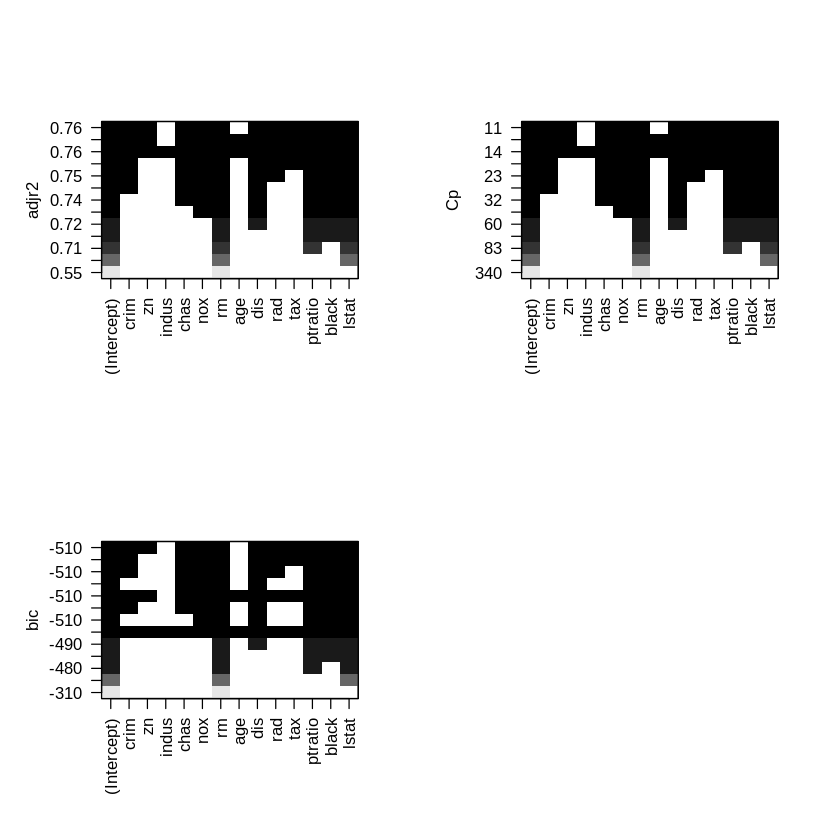

In [45]:
par(mfrow = c(2,2))

# R2 ajustado
plot(boston.df.train.fwd,scale='adjr2')

# Cp
plot(boston.df.train.fwd,scale='Cp')

# BIC
plot(boston.df.train.fwd,scale='bic')

Seleção Regressiva:  Gráficos


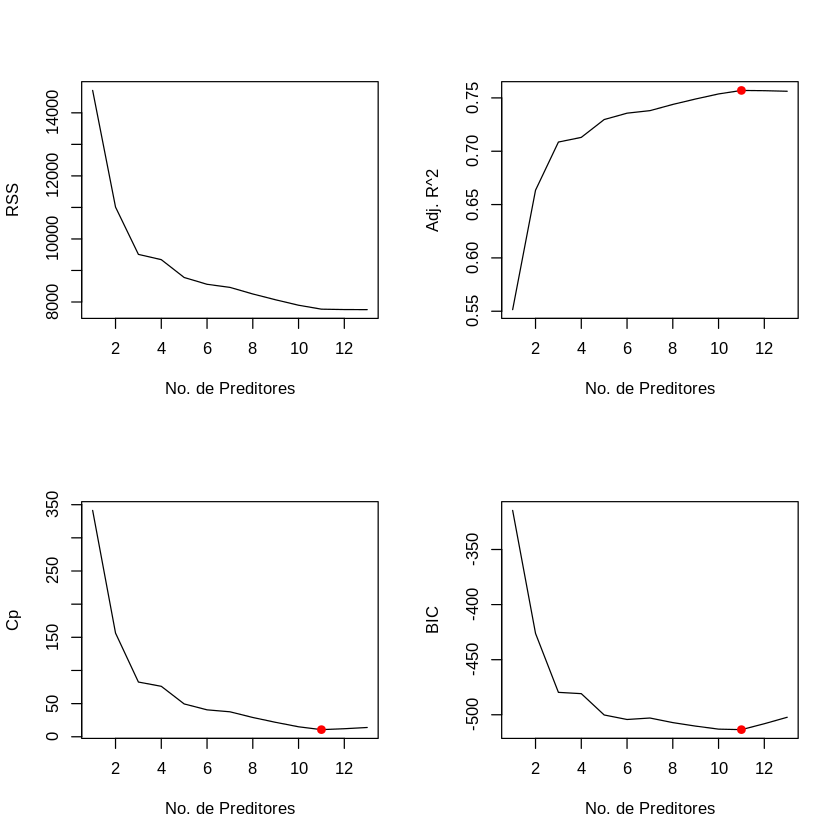

In [36]:
par(mfrow = c(2,2))
cat(crayon::bold("Seleção Regressiva: "),
  crayon::reset("Gráficos\n"))
# RSS
plot(boston.df.train.bwk.sum$rss,xlab='No. de Preditores',ylab='RSS',type='l')

# R2 ajustado
plot(boston.df.train.bwk.sum$adjr2,xlab='No. de Preditores',ylab='Adj. R^2',type='l')
max_p = which.max(boston.df.train.bwk.sum$adjr2)
points(max_p,boston.df.train.bwk.sum$adjr2[max_p],pch=19,col='red')

# Cp
plot(boston.df.train.bwk.sum$cp,xlab='No. de Preditores',ylab='Cp',type='l')
min_p = which.min(boston.df.train.bwk.sum$cp)
points(min_p,boston.df.train.bwk.sum$cp[min_p],pch=19,col='red')

# BIC
plot(boston.df.train.bwk.sum$bic,xlab='No. de Preditores',ylab='BIC',type='l')
min_p = which.min(boston.df.train.bwk.sum$bic)
points(min_p,boston.df.train.bwk.sum$bic[min_p],pch=19,col='red')

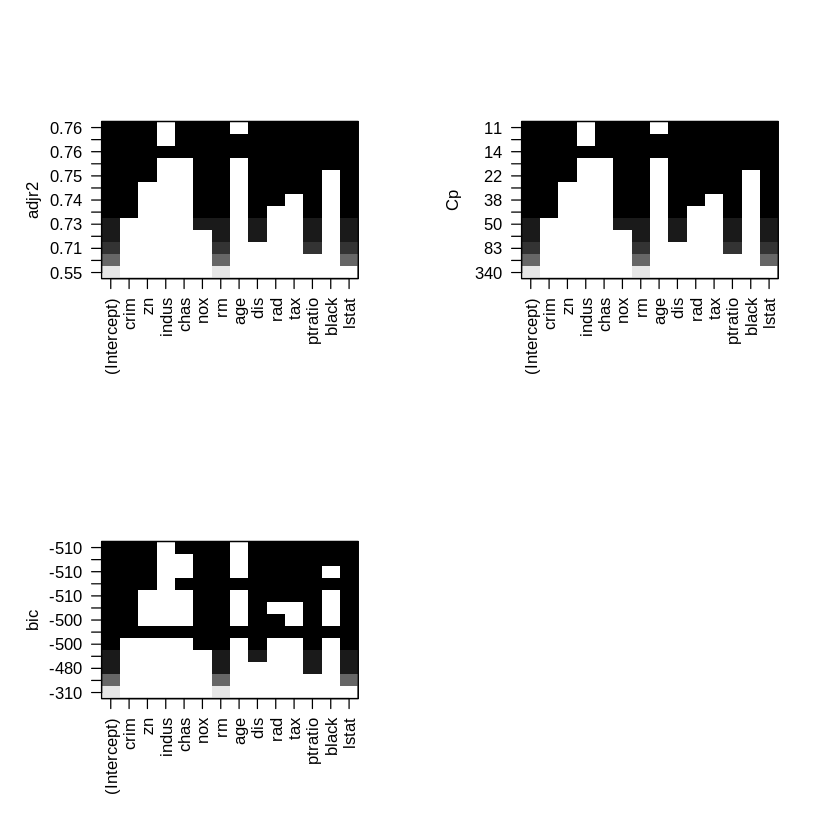

In [46]:
par(mfrow = c(2,2))

# R2 ajustado
plot(boston.df.train.bwk,scale='adjr2')

# Cp
plot(boston.df.train.bwk,scale='Cp')

# BIC
plot(boston.df.train.bwk,scale='bic')

In [37]:
# Coeficientes

best.var.fwd <-which.max(boston.df.train.fwd.sum$adjr2)
cat(crayon::bold("Seleção Progressiva:"),
  crayon::reset("Melhor número de variáveis",
  best.var.fwd,"\n\n"))

boston.df.train.coef.fwd <-coef(boston.df.train.fwd,best.var.fwd)

print(boston.df.train.coef.fwd)
cat("\n\n")

best.var.bwk <-which.max(boston.df.train.bwk.sum$adjr2)
cat(crayon::bold("Seleção Regressiva:"),
  crayon::reset("Melhor número de variáveis",
  best.var.bwk,"\n\n"))

boston.df.train.coef.bwk <-coef(boston.df.train.bwk,best.var.bwk)

print(boston.df.train.coef.bwk)

Seleção Progressiva: Melhor número de variáveis 11 

  (Intercept)          crim            zn          chas           nox 
 27.180505944  -0.114650248   0.041901760   2.221603845 -15.831334606 
           rm           dis           rad           tax       ptratio 
  4.807855740  -1.269548805   0.274431837  -0.012190071  -0.911118848 
        black         lstat 
  0.008284804  -0.408068410 


Seleção Regressiva: Melhor número de variáveis 11 

  (Intercept)          crim            zn          chas           nox 
 27.180505944  -0.114650248   0.041901760   2.221603845 -15.831334606 
           rm           dis           rad           tax       ptratio 
  4.807855740  -1.269548805   0.274431837  -0.012190071  -0.911118848 
        black         lstat 
  0.008284804  -0.408068410 


### **c.** Validação Cruzada **K-fold**

**(c)** Realize a seleção de variáveis e de modelos usando validação cruzada no
conjunto de treino.

In [38]:
get_model_formula <- function(id, object, outcome){
  models <- summary(object)$which[id,-1]
  predictors <- names(which(models == TRUE))
  predictors <- paste(predictors, collapse = "+")
  as.formula(paste0(outcome, "~", predictors))
}

get_cv_error <- function(model.formula, data){
  set.seed(1)
  train.control <- trainControl(method = "cv", number = 10)
  cv <- train(model.formula, data = data, method = "lm", trControl = train.control)
  cv$results$RMSE
}

# cat("Melhor modelo com 3 variáveis:\n\n")
# get_model_formula(3, model.train, "medv")

# Calcular erro de validação cruzada
model.ids <- 1:10
cv.errors <- map(model.ids, get_model_formula, model.train, "medv") %>%
  map(get_cv_error, data=Boston) %>%
  unlist()

# Seleção do modelo que minimiza o erro CV
cat(crayon::bold("Conjunto de Treino\n"),crayon::reset(" - Seleção do modelo que minimiza o erro CV: ", which.min(cv.errors),"com variáveis\n\n"))

cat("Variáveis para o melhor modelo:",which.min(cv.errors),"\n")
print(coef(model.train, which.min(cv.errors)))

Conjunto de Treino
  - Seleção do modelo que minimiza o erro CV:  10 com variáveis

Variáveis para o melhor modelo: 10 
  (Intercept)          crim            zn           nox            rm 
 27.834430326  -0.119068074   0.042116763 -15.301300033   4.831159723 
          dis           rad           tax       ptratio         black 
 -1.308020510   0.290955708  -0.013198455  -0.947501959   0.008720427 
        lstat 
 -0.408388599 


### **d**. Discussão
**(d)** Compare os modelos obtidos nos items **(a)**, **(b)** e **(c)** no 
conjunto de teste. Qual deles é o melhor?